<a href="https://colab.research.google.com/github/robomoan/Data_Science_Study/blob/main/Handson_ML/handson_ml_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 머신러닝 4장
## 모델 훈련

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 선형 회귀

In [ ]:
# 선형 회귀 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

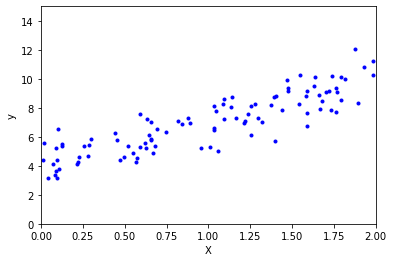

In [ ]:
# X 와 y 사이의 산점도 그리기
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

정규 방정식: $\hat{\theta} = (X^{T}X)^{-1}X^{T}y$

In [ ]:
# X 행렬에 1로만 이루어지 열 추가(절편)
X_b = np.c_[np.ones((100, 1)), X]

# 정규 방정식
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
# 결과 확인
theta_best

array([[4.03314257],
       [2.9718727 ]])

실제 값: $\theta_{0}$ = 4, $\theta_{1}$ = 3

In [ ]:
# theta_best를 사용하여 예측하기
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.03314257],
       [9.97688797]])

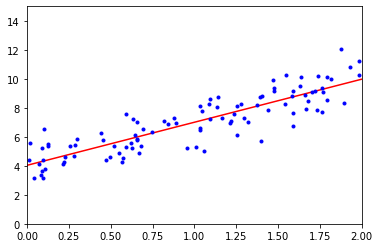

In [ ]:
# 모델의 예측 그래프에 표시

# 두 예측 점을 이으면 회귀 직선이 된다.
plt.plot(X_new, y_predict, "r-") # 빨간색 선
plt.plot(X, y, "b.") # 파란색 점
plt.axis([0, 2, 0, 15]) # x축은 0에서 2까지, y축은 0에서 15까지
plt.show()

사이킷런에서 선형 회귀 이용

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 회귀 직선의 절편과 기울기
lin_reg.intercept_, lin_reg.coef_

(array([4.03314257]), array([[2.9718727]]))

In [ ]:
# 회귀 직선으로 예측하기
lin_reg.predict(X_new)

array([[4.03314257],
       [9.97688797]])

유사 역행렬 이용  
SVD: $X = U \Sigma T^{T}$ 에서  
$X$의 유사역행렬 $X^{+} = T \Sigma U^{T}$  
$\hat{\theta} = X^{+} y$

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.03314257],
       [2.9718727 ]])

In [ ]:
# 유사역행렬 이용하여 직접 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.03314257],
       [2.9718727 ]])

### 경사하강법

배치 경사하강법  
$\nabla_{\theta} \text{MSE} (\theta)= \frac{2}{m} X^{T}(X \theta - y)$  
$\theta^{+} = \theta - \eta \nabla_{\theta} \text{MSE}$ 

In [ ]:
# 배치 경사하강법
eta = 0.1 # 학습률
n_iterations = 1000 # 반복 횟수
m = 100 # 샘플 개수

theta = np.random.randn(2, 1) # theta의 초기값 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.03314257],
       [2.9718727 ]])

확률적 경사 하강법

In [ ]:
# 확률적 경사 하강법
n_epochs = 50 # 에포크 횟수
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # theta의 초기값 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0~m-1 사이에 랜덤하게 정수 하나 뽑음
    xi = X_b[random_index: random_index+1] # 뽑힌 수를 인덱스 값으로 갖는 샘플 (랜덤 샘플)
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 그래디언트 구하기
    eta = learning_schedule(epoch * m + i) # 학습률 구하기, 에포크에 반비례, 타임 스텝에 반비례
    theta = theta - eta * gradients # theta 업데이트

In [ ]:
theta

array([[4.00809909],
       [2.98981231]])

In [ ]:
# 사이킷런을 이용하여 확률적 경사하강법 사용하기
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta = 0.1)
sgd_reg.fit(X, y.ravel())